# This Algorithm Outputs the Monthly Inland Water Extent

In [3]:
import ee
import geemap
import matplotlib.pyplot as plt
import pandas as pd
import json

In [4]:
geemap.ee_initialize()

In [5]:
m = geemap.Map(center=[20,0],zoom=2)

In [20]:
def geometry_geoJson(file_path):
  with open(file_path) as f:
      json_data = json.load(f)
  moi =  geemap.geojson_to_ee(json_data)
  return moi


def inland_water_extent(startDate, endDate, roi, filename):

    start = startDate
    end = endDate
    waterMonthly = ee.ImageCollection("JRC/GSW1_4/MonthlyHistory").filterDate(start, end)
  

    def func_nbk(i):
        return i.eq(2).updateMask(i.gt(0)).copyProperties(i, ['system:time_start'])

    waterMonthlyMask = waterMonthly.map(func_nbk)
    waterOccurrence = waterMonthlyMask.mean().clip(roi)

    # Add visualization to map (assuming you have a geemap.Map instance `m`)
    m.addLayer(waterOccurrence, {'min': 0, 'max': 1, 'palette': ['white', 'blue']}, 'Water Occurrence')
    m.centerObject(roi, 9)

   
    def cal_area(fea):
        area = ee.Image.pixelArea().updateMask(fea).reduceRegion(
             reducer=ee.Reducer.sum(), geometry=roi, scale=30,bestEffort=True,).get('area')
        kmarea = ee.Number(area).divide(1e6)
        return fea.set({'m2': area, 'km2': kmarea})

    data = waterMonthlyMask.map(cal_area)

    data_list = data.getInfo()['features']
    area_list = [{'m2': f['properties']['m2'], 'km2': f['properties']['km2'], 'time': f['properties']['system:time_start']} for f in data_list]

    # Convert the list of dictionaries to a pandas DataFrame
    df = pd.DataFrame(area_list,index=[x for x in range(1,len(area_list)+1)])

    # Convert the 'time' column to datetime
    df['time'] = pd.to_datetime(df['time'], unit='ms')

    # Sort the DataFrame by time
    df = df.sort_values(by='time')

    # Display the Table
    print(df)
    print('\n')

    #save the Table
    df.to_csv(f"{filename}.csv")

    # Plotting
    fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

    # Plot km2
    ax[0].plot(df['time'], df['km2'], marker='o')
    ax[0].set_ylabel('Area (km²)')
    ax[0].set_title('Surface Water Extent Time Series (km²)')
    ax[0].grid(True)

    #Plot m2
    ax[1].plot(df['time'], df['m2'], marker='o', color='red')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Area (m²)')
    ax[1].set_title('Surface Water Extent Time Series (m²)')
    ax[1].grid(True)

    plt.tight_layout()

    # Save Plot
    # plt.savefig(f"{filename}.jpg")
    plt.show()

              m2         km2       time
1   1.867238e+08  186.723804 2018-01-01
2   1.227113e+08  122.711302 2018-02-01
3   7.285715e+07   72.857148 2018-03-01
4   4.151754e+07   41.517543 2018-04-01
5   2.356959e+07   23.569588 2018-05-01
6   6.529395e+07   65.293950 2018-06-01
7   0.000000e+00    0.000000 2018-07-01
8   5.011091e+07   50.110905 2018-08-01
9   2.556267e+08  255.626736 2018-09-01
10  2.487460e+08  248.746010 2018-10-01
11  2.355263e+08  235.526281 2018-11-01
12  1.812407e+08  181.240726 2018-12-01




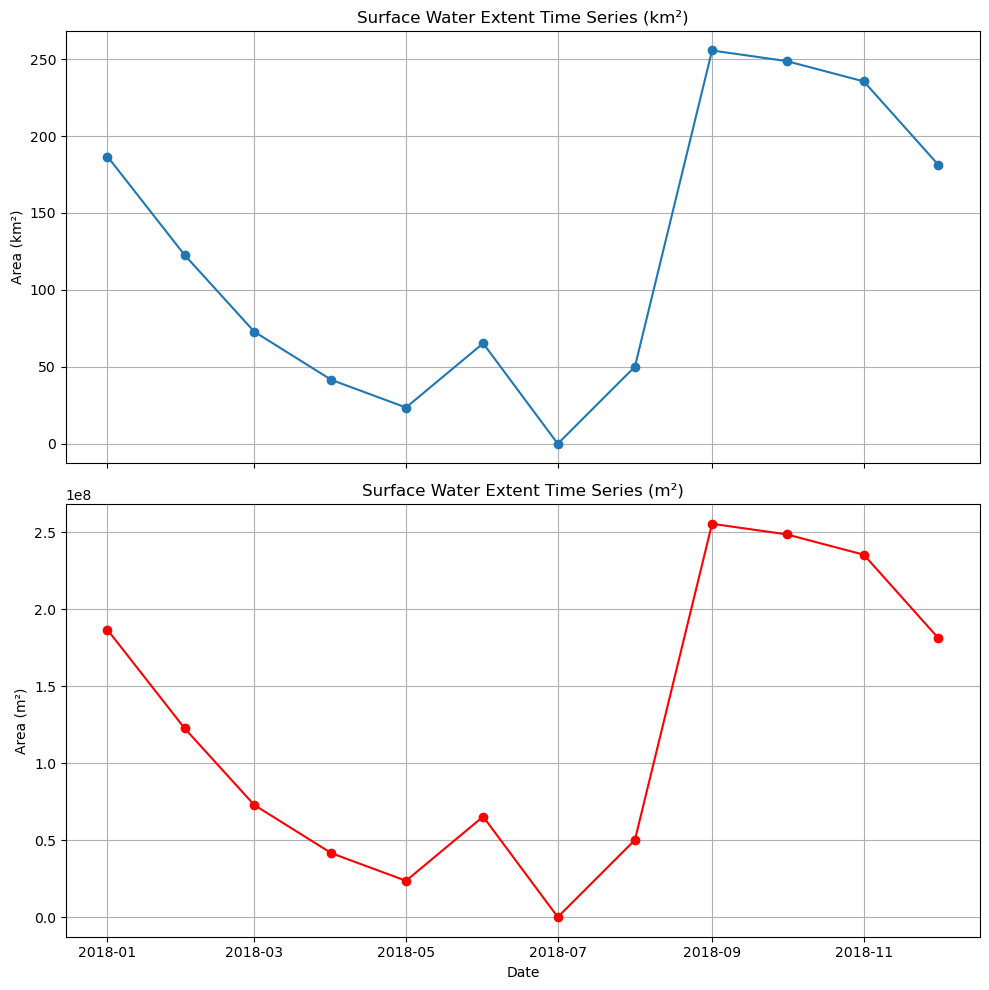

In [9]:
# Date range from 2018-01-01 - 2019-01-01
roi = geometry_geoJson("C:\\Users\\ibnha\\Documents\\TungabhadraReservoir.geojson")

inland_water_extent('2018-01-01','2019-01-01',roi,"TungabhadraReservoir")

In [10]:
m

Map(center=[15.199544156353635, 76.19590699014441], controls=(WidgetControl(options=['position', 'transparent_…

              m2         km2       time
1   1.393610e+08  139.361015 2019-01-01
2   1.005890e+08  100.588976 2019-02-01
3   7.863704e+07   78.637036 2019-03-01
4   5.191635e+07   51.916352 2019-04-01
5   2.918571e+07   29.185712 2019-05-01
6   3.261633e+06    3.261633 2019-06-01
7   4.810042e+06    4.810042 2019-07-01
8   2.435543e+08  243.554301 2019-08-01
9   2.397734e+08  239.773359 2019-09-01
10  2.495300e+08  249.529973 2019-10-01
11  2.538514e+08  253.851355 2019-11-01
12  2.524920e+08  252.491971 2019-12-01




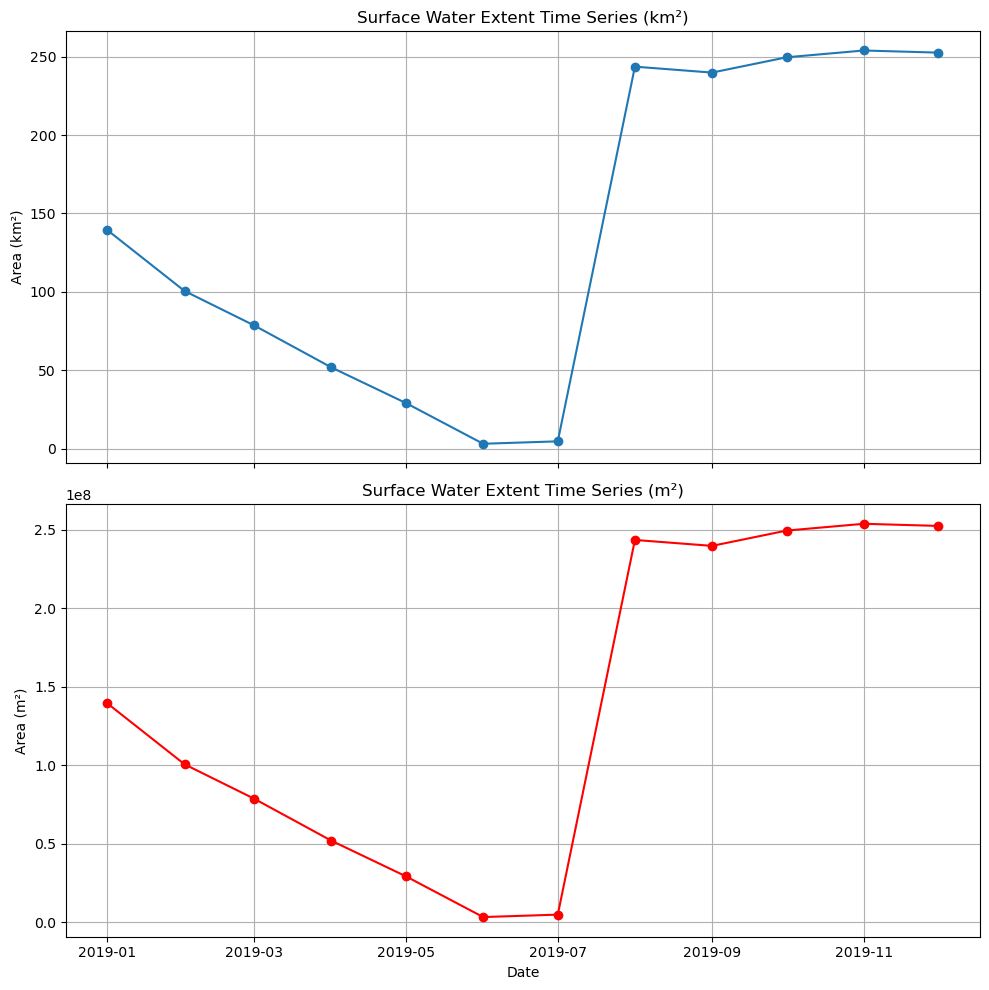

In [13]:
# Date range from 2019-01-01 - 2020-01-01
roi = geometry_geoJson("C:\\Users\\ibnha\\Documents\\TungabhadraReservoir.geojson")

inland_water_extent('2019-01-01','2020-01-01',roi,'Tungabhadra')

              m2           km2       time
1   2.451825e+10  24518.250966 2019-01-01
2   2.710560e+10  27105.598004 2019-02-01
3   2.714771e+10  27147.707731 2019-03-01
4   2.745931e+10  27459.308456 2019-04-01
5   2.643805e+10  26438.054763 2019-05-01
6   2.745106e+10  27451.062021 2019-06-01
7   2.768956e+10  27689.556920 2019-07-01
8   2.778465e+10  27784.646302 2019-08-01
9   2.778380e+10  27783.803489 2019-09-01
10  2.778131e+10  27781.312178 2019-10-01
11  2.761545e+10  27615.447705 2019-11-01
12  2.654394e+10  26543.944739 2019-12-01




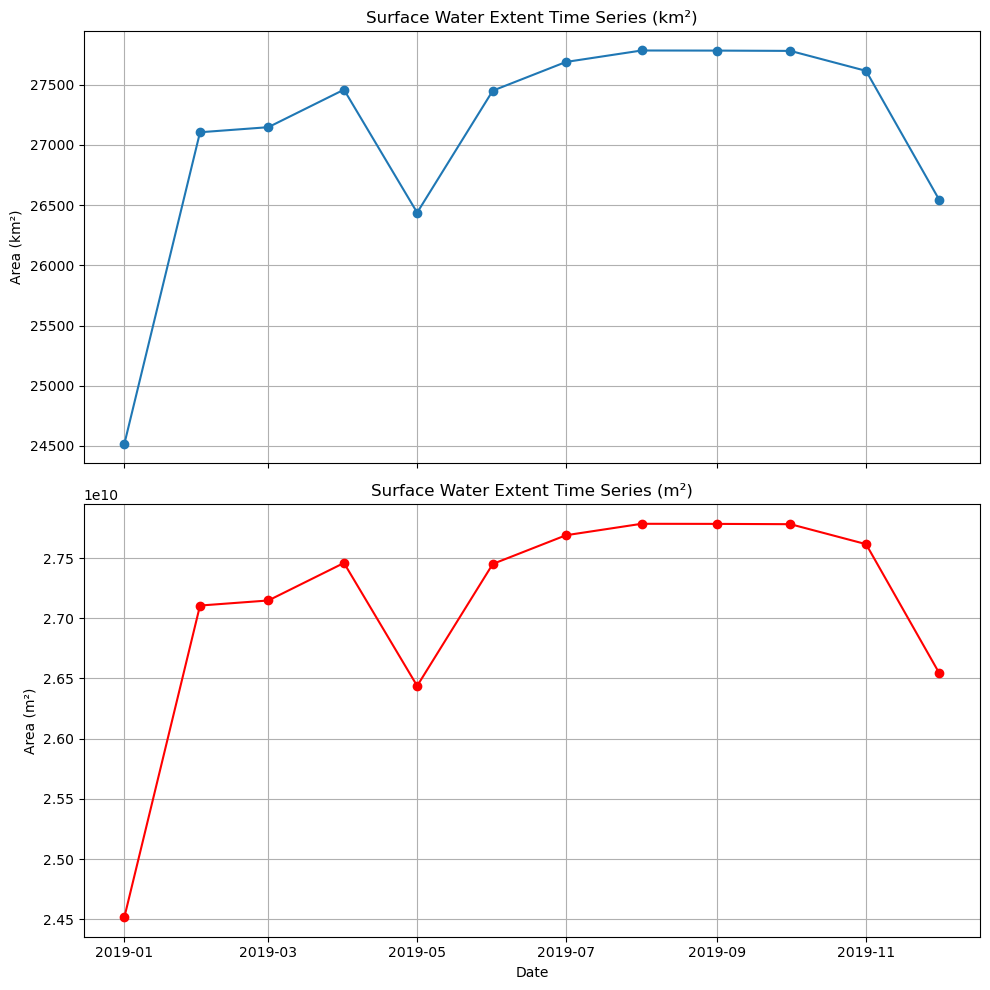

In [21]:
# Date range from 2019-01-01 - 2020-01-01
roi = geometry_geoJson("C:\\Users\\ibnha\\Documents\\LakeMalawi.geojson")

inland_water_extent("2019-01-01","2020-01-01",roi,'Lake Malawi')